# Proyecto Data Science - Predicción del precio de vuelos

 **Descripción del problema de negocio y enfoque de solución**
 Problema de negocio
La industria de la aviación se enfrenta al desafío constante de establecer precios competitivos y dinámicos para los boletos de avión. Factores como la aerolínea, el destino, la duración del vuelo, el tipo de clase, la anticipación de compra, entre otros, influyen considerablemente en el precio final del pasaje.

En este contexto, una agencia de viajes en línea desea desarrollar una herramienta de predicción de precios que permita a sus clientes estimar el costo de un boleto de avión antes de comprarlo. Esta estimación ayudaría a mejorar la experiencia del usuario y optimizaría las decisiones de compra.

**Objetivo del proyecto**
Desarrollar un modelo de Machine Learning que prediga el precio de un boleto de avión (variable objetivo) utilizando datos históricos de vuelos con sus respectivas características.

Metodología: CRISP-DM
Utilizaremos la metodología CRISP-DM, un enfoque estándar en proyectos de ciencia de datos, que consta de las siguientes etapas:

Comprensión del negocio: Entender la necesidad del cliente y el impacto del modelo.

Comprensión de los datos: Explorar y familiarizarse con los datasets business.csv y economy.csv.

Preparación de los datos: Limpieza, tratamiento de valores nulos, creación de variables, transformación de fechas, encoding de variables categóricas, etc.

Modelado: Aplicar modelos de regresión como:

Regresión lineal

Árboles de decisión

Random Forest o XGBoost

Modelos con regularización (Ridge, Lasso)

Evaluación del modelo: Usar métricas como MAE, RMSE y R² para comparar el desempeño de los modelos.


**Tareas específicas a realizar**
Análisis exploratorio de datos (EDA):

Distribución de precios

Correlación entre variables

Comparaciones entre clase economy y business

Calidad y limpieza de datos:

Revisión de valores nulos

Conversión de fechas

Detección y tratamiento de outliers

Ingeniería de características:

Crear variables como: hora del día, duración del vuelo, día de la semana, etc.

One-hot encoding para variables categóricas

Entrenamiento de modelos:

Separar conjunto de entrenamiento y prueba

Aplicar y comparar distintos algoritmos de regresión

Ajuste de hiperparámetros con GridSearchCV (si es necesario)

Evaluación y selección del modelo final

** Variable objetivo**
price (o nombre similar en el dataset): representa el valor a predecir, es decir, el precio del pasaje de avión.



In [1]:
import pandas as pd

# Cargar los archivos Excel
economy = pd.read_excel("/content/economy.xlsx")
business = pd.read_excel("/content/business.xlsx")

In [2]:
# Verificar las dimensiones de cada dataset
print("Economy shape:", economy.shape)
print("Business shape:", business.shape)

Economy shape: (206774, 11)
Business shape: (93487, 11)


In [3]:
# Vista preliminar de los primeros registros
print("\nPrimeras filas de economy:")
display(economy.head())
print("\nPrimeras filas de business:")
display(business.head())


Primeras filas de economy:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955



Primeras filas de business:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [4]:
# Información general de cada dataset
print("\nInfo economy:")
economy.info()

print("\nInfo business:")
business.info()


Info economy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        206774 non-null  datetime64[ns]
 1   airline     206774 non-null  object        
 2   ch_code     206774 non-null  object        
 3   num_code    206774 non-null  int64         
 4   dep_time    206774 non-null  object        
 5   from        206774 non-null  object        
 6   time_taken  206774 non-null  object        
 7   stop        206774 non-null  object        
 8   arr_time    206774 non-null  object        
 9   to          206774 non-null  object        
 10  price       206774 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 17.4+ MB

Info business:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype    

Problema de negocio:
La agencia de viajes desea desarrollar un sistema capaz de predecir el precio de un boleto de avión. Esta herramienta permitirá a los usuarios obtener estimaciones precisas antes de comprar un vuelo, mejorando su experiencia y aumentando la competitividad de la agencia frente a otras plataformas.

Objetivo del proyecto:
Construir un modelo de Machine Learning que prediga el precio de un boleto aéreo (price) basado en características del vuelo como:

aerolínea (airline)

código del vuelo (ch_code, num_code)

duración del vuelo (time_taken)

cantidad de escalas (stop)

horario de salida/llegada (dep_time, arr_time)

origen y destino (from, to)

clase del vuelo (economy o business, que podemos incorporar como nueva variable)

Variable objetivo:

price (precio del boleto)

Variables predictoras:

airline, ch_code, num_code, dep_time, from, time_taken, stop, arr_time, to, date, más la clase (class: economy o business, que agregaremos al unir los datasets)

Metodología a aplicar (pipeline):

Carga y unificación de datos:

Leer ambos archivos .xlsx (business.xlsx y economy.xlsx).

Unificarlos en un solo DataFrame agregando una columna nueva (class) que indique si el vuelo es de clase economy o business.

Calidad de datos y preprocesamiento:

Identificación y tratamiento de valores nulos o inconsistentes.

Limpieza de columnas mal formateadas como stop.

Transformación de variables de texto o temporales (por ejemplo, convertir time_taken en minutos).

Conversión de variables categóricas a variables dummy si es necesario.

Análisis exploratorio de datos (EDA):

Distribuciones de precios por clase, aerolínea, cantidad de escalas, duración del vuelo, etc.

Visualización de correlaciones entre variables numéricas.

Preparación para modelado:

Selección de características más relevantes.

Escalado o codificación según corresponda.

División de datos en conjunto de entrenamiento y test.

Modelamiento predictivo:

Entrenamiento con modelos de regresión como:

Regresión lineal

Árboles de decisión

Random Forest

XGBoost o Gradient Boosting Regressor

Evaluación de desempeño usando métricas como MAE, RMSE y R².

Ajuste de hiperparámetros (tuning):

Uso de técnicas como GridSearchCV o RandomizedSearchCV.

Evaluación final y conclusión:

Interpretación de resultados.

Recomendaciones para producción o uso del modelo.

# agregar la columna class y unir ambos en un único DataFrame:

In [5]:
# Agregar columna 'class'
economy['class'] = 'economy'
business['class'] = 'business'

# Unir ambos DataFrames
df = pd.concat([economy, business], ignore_index=True)

# Ver las primeras filas del dataset unificado
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy


In [6]:
from aed import calidad_datos
calidad_datos(df)

,tipo_dato,nulos,porcentaje_nulos,valores_unicos,ceros,porcentaje_ceros,outliers,media,desviacion_std,coef_variacion,asimetria,curtosis,moda
date,datetime64[ns],0,0.0,49,0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-03-07 00:00:00
airline,object,0,0.0,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Vistara
ch_code,object,0,0.0,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,UK
num_code,int64,0,0.0,1255,0,0.0,49024,1417.771709,1974.514439,1.392689,2.816143,6.931583,808
dep_time,object,0,0.0,251,0,0.0,0,NaN,NaN,NaN,NaN,NaN,07:00:00
from,object,0,0.0,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Delhi
time_taken,object,0,0.0,483,0,0.0,0,NaN,NaN,NaN,NaN,NaN,02h 10m
stop,object,0,0.0,40,0,0.0,0,NaN,NaN,NaN,NaN,NaN,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...
arr_time,object,0,0.0,266,0,0.0,0,NaN,NaN,NaN,NaN,NaN,19:55:00
to,object,0,0.0,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Mumbai


In [7]:
# Solo los valores únicos
print(df['stop'].unique())

['non-stop' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t

In [8]:
#preprocesamos stop para reducir su cardinalidad

import re

def simplificar_stop(valor):
    if pd.isna(valor):
        return 'unknown'
    elif 'non-stop' in valor:
        return 'non-stop'
    elif '1-stop' in valor:
        return '1-stop'
    elif '2+' in valor or '2-stop' in valor:
        return '2+-stop'
    else:
        return 'other'

# Aplicar la función
df['stop_clean'] = df['stop'].apply(simplificar_stop)

# Verificar resultados
print(df['stop_clean'].value_counts())

stop_clean
1-stop      250929
non-stop     36044
2+-stop      13288
Name: count, dtype: int64


In [9]:
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stop_clean
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy,non-stop
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy,non-stop
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy,non-stop
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy,non-stop
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy,non-stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265,business,1-stop
300257,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105,business,1-stop
300258,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099,business,1-stop
300259,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585,business,1-stop


In [10]:
print(df['time_taken'].unique())

['02h 10m' '02h 20m' '02h 15m' '02h 05m' '12h 15m' '16h 20m' '11h 45m'
 '14h 30m' '15h 40m' '03h 45m' '02h 30m' '05h 50m' '08h 00m' '06h 00m'
 '14h 40m' '16h 10m' '18h 00m' '23h 10m' '24h 10m' '08h 50m' '04h 30m'
 '15h 15m' '11h 00m' '19h 05m' '22h 50m' '26h 25m' '17h 45m' '19h 35m'
 '26h 40m' '15h 10m' '20h 50m' '11h 25m' '22h 15m' '26h 00m' '21h 45m'
 '03h 50m' '04h 25m' '07h 40m' '08h 20m' '10h 25m' '23h 45m' '19h 30m'
 '06h 30m' '12h 25m' '21h 05m' '28h 10m' '28h 15m' '09h 15m' '17h 55m'
 '07h 05m' '13h 50m' '07h 35m' '15h 50m' '24h 25m' '04h 10m' '04h 15m'
 '05h 05m' '29h 20m' '17h 00m' '27h 10m' '24h 45m' '05h 45m' '12h 45m'
 '13h 45m' '17h 50m' '05h 30m' '23h 50m' '05h 00m' '26h 30m' '12h 50m'
 '08h 55m' '11h 10m' '12h 10m' '15h 35m' '15h 45m' '07h 55m' '13h 15m'
 '16h 00m' '22h 45m' '06h 20m' '07h 15m' '30h 05m' '18h 15m' '06h 05m'
 '02h 00m' '12h 20m' '03h 30m' '10h 15m' '14h 10m' '25h 35m' '04h 05m'
 '09h 45m' '06h 40m' '09h 40m' '10h 05m' '12h 35m' '07h 00m' '08h 15m'
 '15h 

In [11]:
def convertir_a_minutos(duracion):
    if pd.isna(duracion):
        return None
    horas = re.search(r'(\d+)h', duracion)
    minutos = re.search(r'(\d+)m', duracion)
    total = 0
    if horas:
        total += int(horas.group(1)) * 60
    if minutos:
        total += int(minutos.group(1))
    return total

df['duration_min'] = df['time_taken'].apply(convertir_a_minutos)

In [12]:
df.head(50)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stop_clean,duration_min
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy,non-stop,130
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy,non-stop,140
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy,non-stop,130
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy,non-stop,135
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy,non-stop,140
5,2022-02-11,Vistara,UK,945,11:40:00,Delhi,02h 20m,non-stop,14:00:00,Mumbai,5955,economy,non-stop,140
6,2022-02-11,Vistara,UK,927,09:30:00,Delhi,02h 05m,non-stop,11:35:00,Mumbai,6060,economy,non-stop,125
7,2022-02-11,Vistara,UK,951,14:20:00,Delhi,02h 10m,non-stop,16:30:00,Mumbai,6060,economy,non-stop,130
8,2022-02-11,GO FIRST,G8,334,08:00:00,Delhi,02h 10m,non-stop,10:10:00,Mumbai,5954,economy,non-stop,130
9,2022-02-11,GO FIRST,G8,336,14:20:00,Delhi,02h 15m,non-stop,16:35:00,Mumbai,5954,economy,non-stop,135


In [13]:
#la columna num_code parece representar el número de vuelo asignado por la aerolínea, también conocido como "número de vuelo comercial".
df['flight_code'] = df['ch_code'].astype(str) + df['num_code'].astype(str)

In [14]:
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,stop_clean,duration_min,flight_code
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953,economy,non-stop,130,SG8709
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953,economy,non-stop,140,SG8157
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956,economy,non-stop,130,I5764
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955,economy,non-stop,135,UK995
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955,economy,non-stop,140,UK963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK,822,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,69265,business,1-stop,605,UK822
300257,2022-03-31,Vistara,UK,826,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,77105,business,1-stop,625,UK826
300258,2022-03-31,Vistara,UK,832,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,79099,business,1-stop,830,UK832
300259,2022-03-31,Vistara,UK,828,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,81585,business,1-stop,600,UK828


In [15]:
#eliminamos columnas innecesarias

columnas_a_eliminar = ['ch_code', 'num_code', 'dep_time', 'arr_time', 'stop', 'time_taken' ]
df.drop(columns=columnas_a_eliminar, inplace=True)

In [16]:
df

,date,airline,from,to,price,class,stop_clean,duration_min,flight_code
0,2022-02-11,SpiceJet,Delhi,Mumbai,5953,economy,non-stop,130,SG8709
1,2022-02-11,SpiceJet,Delhi,Mumbai,5953,economy,non-stop,140,SG8157
2,2022-02-11,AirAsia,Delhi,Mumbai,5956,economy,non-stop,130,I5764
3,2022-02-11,Vistara,Delhi,Mumbai,5955,economy,non-stop,135,UK995
4,2022-02-11,Vistara,Delhi,Mumbai,5955,economy,non-stop,140,UK963
...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Chennai,Hyderabad,69265,business,1-stop,605,UK822
300257,2022-03-31,Vistara,Chennai,Hyderabad,77105,business,1-stop,625,UK826
300258,2022-03-31,Vistara,Chennai,Hyderabad,79099,business,1-stop,830,UK832
300259,2022-03-31,Vistara,Chennai,Hyderabad,81585,business,1-stop,600,UK828


In [17]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df

,date,airline,from,to,price,class,stop_clean,duration_min,flight_code
0,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,non-stop,130,SG8709
1,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,non-stop,140,SG8157
2,2022-02-11,AirAsia,Delhi,Mumbai,5956.0,economy,non-stop,130,I5764
3,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,non-stop,135,UK995
4,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,non-stop,140,UK963
...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Chennai,Hyderabad,69265.0,business,1-stop,605,UK822
300257,2022-03-31,Vistara,Chennai,Hyderabad,77105.0,business,1-stop,625,UK826
300258,2022-03-31,Vistara,Chennai,Hyderabad,79099.0,business,1-stop,830,UK832
300259,2022-03-31,Vistara,Chennai,Hyderabad,81585.0,business,1-stop,600,UK828


In [18]:
calidad_datos(df)

,tipo_dato,nulos,porcentaje_nulos,valores_unicos,ceros,porcentaje_ceros,outliers,media,desviacion_std,coef_variacion,asimetria,curtosis,moda
price,float64,108,0.035969,12096,0,0.0,15,20853.320896,22643.176118,1.085831,1.054887,-0.435194,54608.0
date,datetime64[ns],0,0.000000,49,0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-03-07 00:00:00
airline,object,0,0.000000,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Vistara
from,object,0,0.000000,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Delhi
to,object,0,0.000000,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Mumbai
class,object,0,0.000000,2,0,0.0,0,NaN,NaN,NaN,NaN,NaN,economy
stop_clean,object,0,0.000000,3,0,0.0,0,NaN,NaN,NaN,NaN,NaN,1-stop
duration_min,int64,0,0.000000,476,0,0.0,2004,733.066416,431.574808,0.588725,0.602980,-0.269004,130
flight_code,object,0,0.000000,1569,0,0.0,0,NaN,NaN,NaN,NaN,NaN,UK706


de acuerdo al resumen de calidad podemos observar que tenemos 108 valores nulos en price, lo que representa un porcentaje de 3,6%, en consecuencia podriamos tomar la decision de prescindior de ellos para continuar con nuestro analisis

In [19]:
#imputar valores nulos
df = df.dropna(subset=['price'])
print(f"Cantidad de valores nulos después de imputar: {df['price'].isnull().sum()}")


Cantidad de valores nulos después de imputar: 0


In [20]:
#Identificación y manejo de outliers en 'price'
# Usamos el método del IQR (Interquartile Range) para detectar outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
# Definir los límites superior e inferior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [22]:
# Identificar los outliers
outliers = df[(df['price'] < limite_inferior) | (df['price'] > limite_superior)]
# Imprimir los outliers
print(f"Cantidad de outliers encontrados: {len(outliers)}")

Cantidad de outliers encontrados: 15


la cantidad de outliers es pequeña, tambien podriamos eliminarlos

In [23]:
# Eliminar outliers
df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]
print(f"Cantidad de registros después de eliminar outliers: {df.shape[0]}")

Cantidad de registros después de eliminar outliers: 300138


In [24]:
calidad_datos(df)

,tipo_dato,nulos,porcentaje_nulos,valores_unicos,ceros,porcentaje_ceros,outliers,media,desviacion_std,coef_variacion,asimetria,curtosis,moda
date,datetime64[ns],0,0.0,49,0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-03-07 00:00:00
airline,object,0,0.0,8,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Vistara
from,object,0,0.0,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Delhi
to,object,0,0.0,6,0,0.0,0,NaN,NaN,NaN,NaN,NaN,Mumbai
price,float64,0,0.0,12085,0,0.0,0,20849.393736,22636.926405,1.085735,1.054244,-0.438757,54608.0
class,object,0,0.0,2,0,0.0,0,NaN,NaN,NaN,NaN,NaN,economy
stop_clean,object,0,0.0,3,0,0.0,0,NaN,NaN,NaN,NaN,NaN,1-stop
duration_min,int64,0,0.0,476,0,0.0,2004,733.012681,431.605847,0.588811,0.603130,-0.268992,130
flight_code,object,0,0.0,1569,0,0.0,0,NaN,NaN,NaN,NaN,NaN,UK706


para el precio **Asimetría:** 1.05
Esto indica una distribución sesgada positivamente (asimetría a la derecha). Es decir:

Hay más valores bajos y unos pocos valores muy altos.

La cola derecha (valores altos) está más extendida.

Es común en precios donde hay vuelos económicos y algunos pocos muy costosos.

**Curtosis:** -0.438757
La curtosis negativa indica que la distribución es platicúrtica:

Tiene colas más livianas que una distribución normal.

La concentración de datos en el centro es más baja; la distribución está más "achatada".



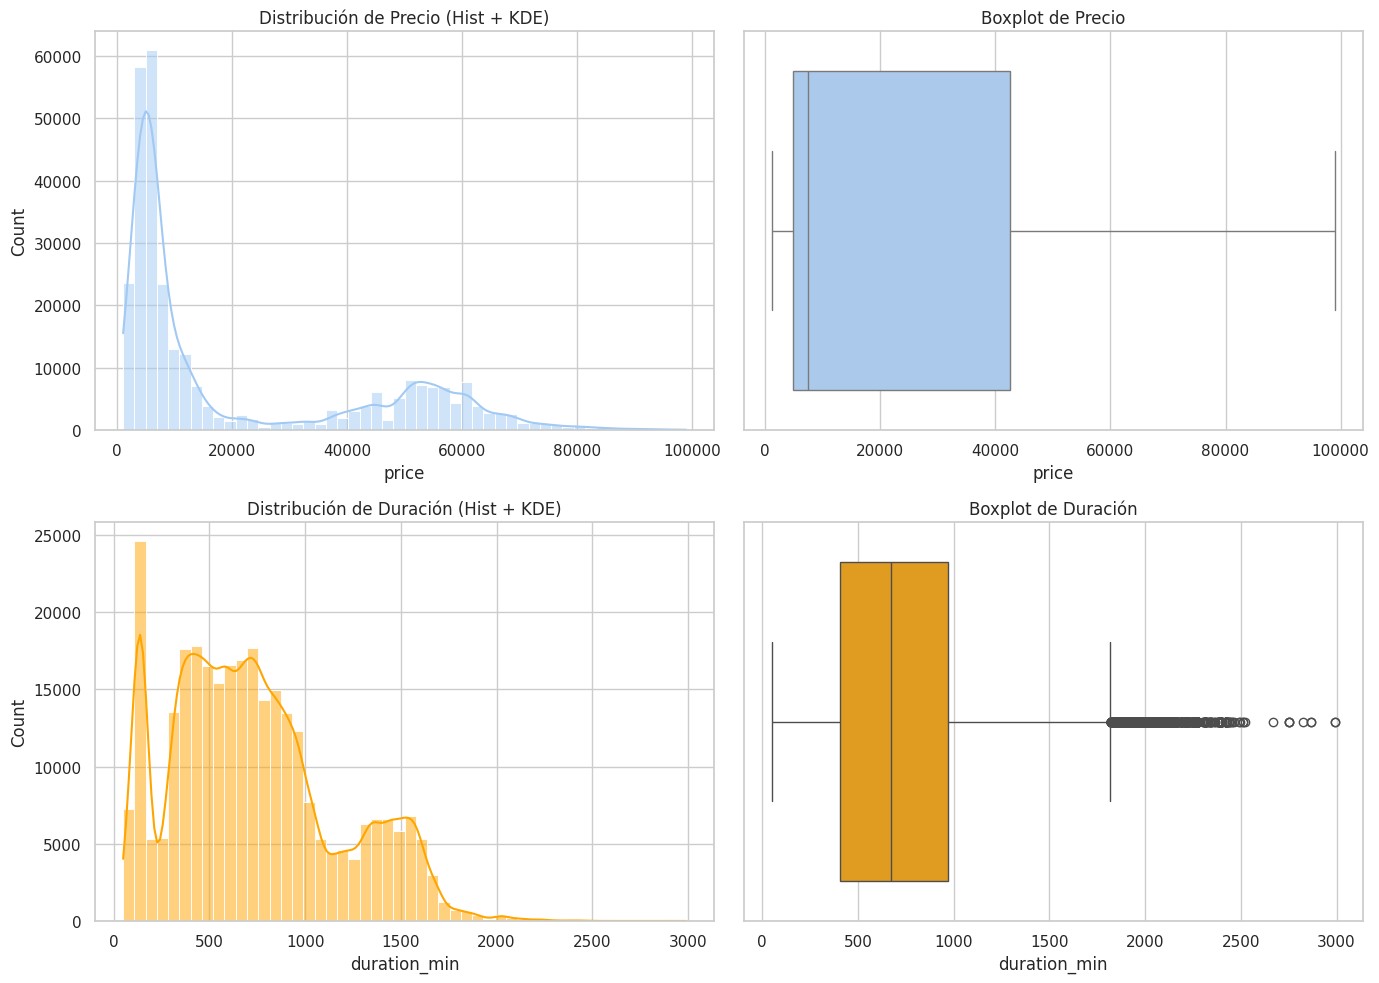

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style="whitegrid", palette="pastel")

# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y KDE para price
sns.histplot(df['price'], kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribución de Precio (Hist + KDE)')

# Boxplot para price
sns.boxplot(x=df['price'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de Precio')

# Histograma y KDE para duration_min
sns.histplot(df['duration_min'], kde=True, ax=axes[1, 0], bins=50, color='orange')
axes[1, 0].set_title('Distribución de Duración (Hist + KDE)')

# Boxplot para duration_min
sns.boxplot(x=df['duration_min'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot de Duración')

plt.tight_layout()
plt.show()

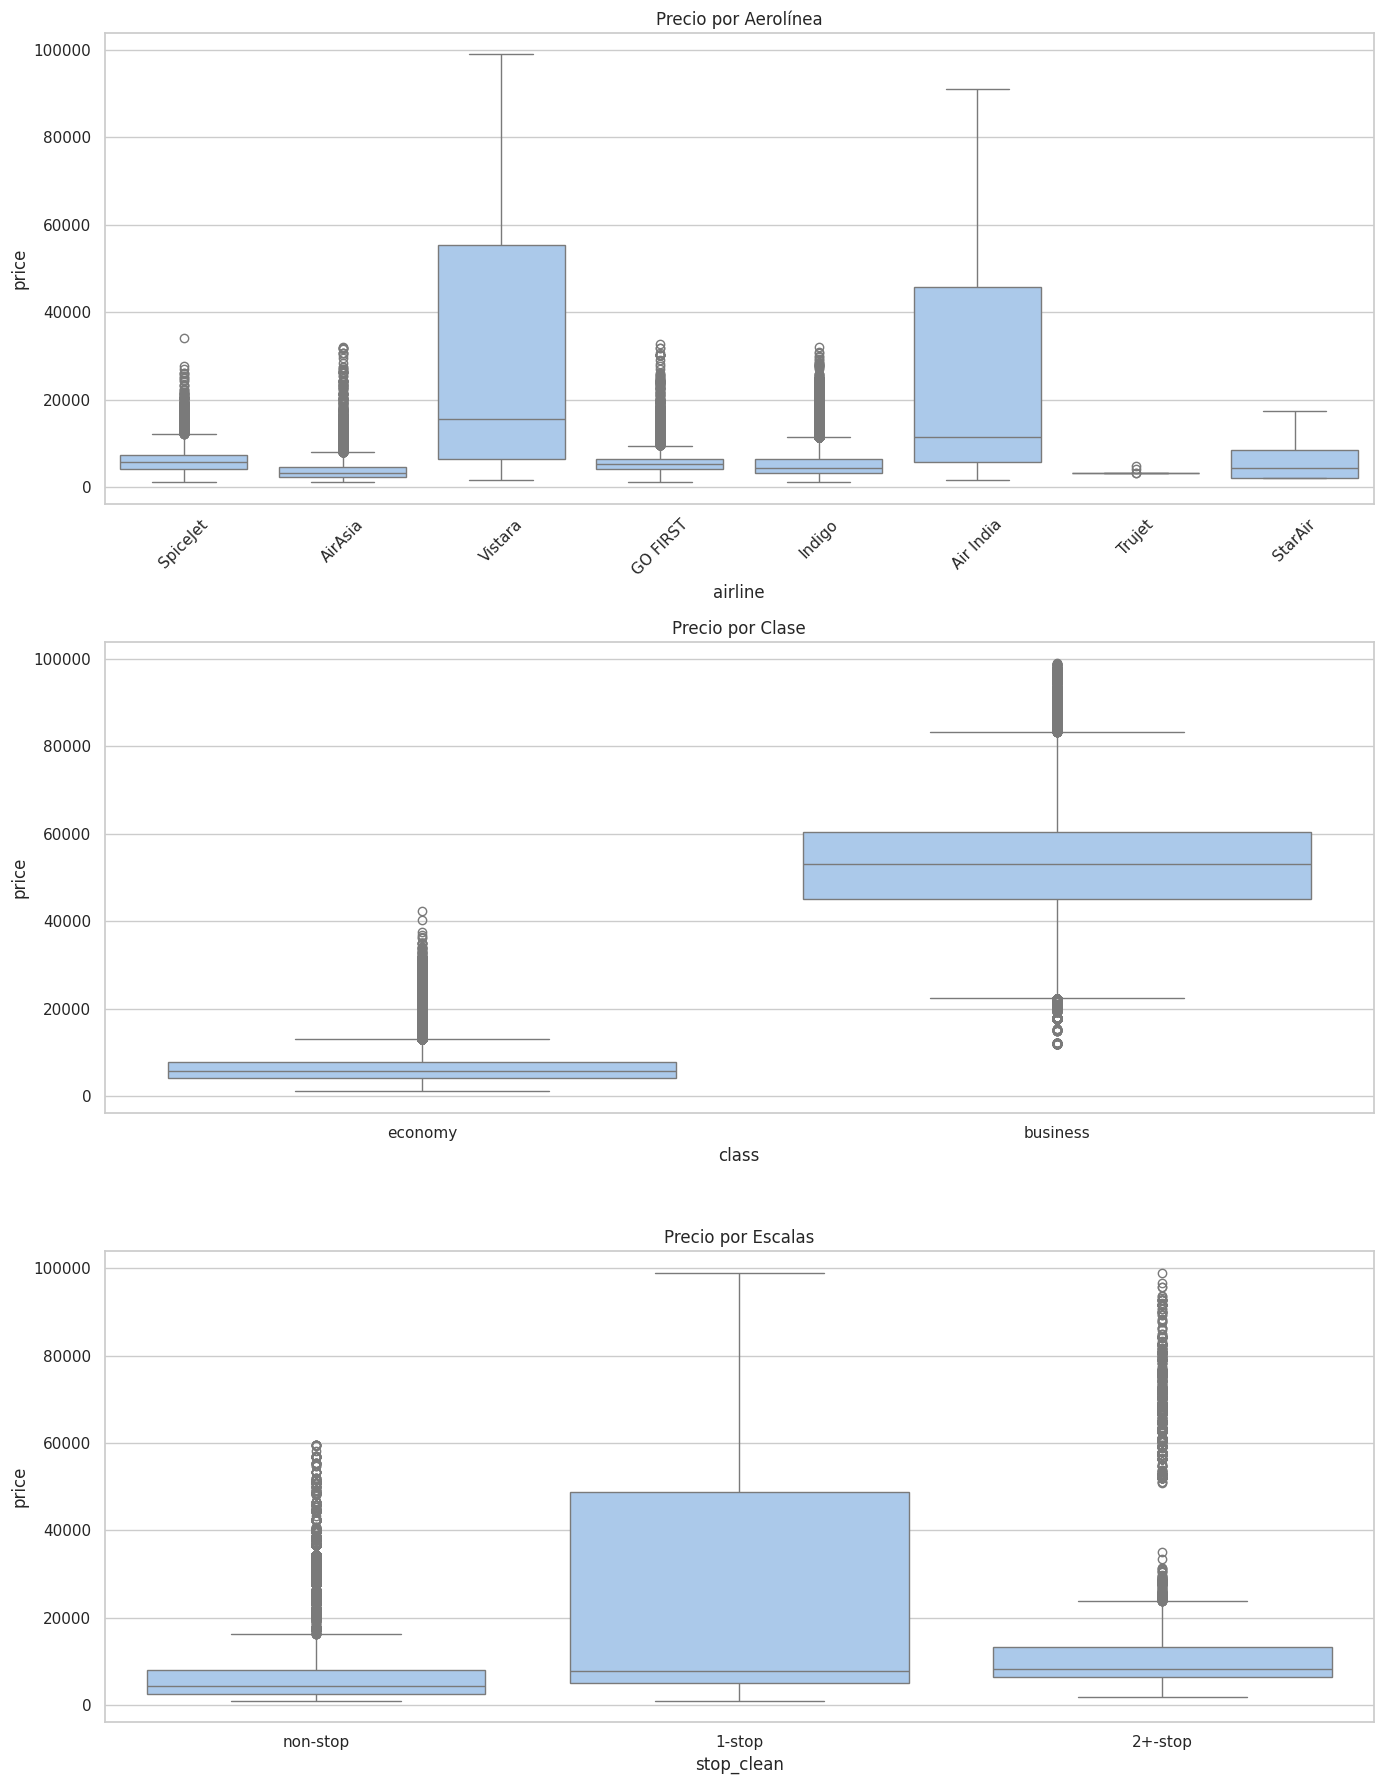

In [26]:
# Gráficos bivariados: price vs variables categóricas

fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Precio según aerolínea
sns.boxplot(data=df, x='airline', y='price', ax=axes[0])
axes[0].set_title('Precio por Aerolínea')
axes[0].tick_params(axis='x', rotation=45)

# Precio según clase
sns.boxplot(data=df, x='class', y='price', ax=axes[1])
axes[1].set_title('Precio por Clase')

# Precio según número de escalas
sns.boxplot(data=df, x='stop_clean', y='price', ax=axes[2])
axes[2].set_title('Precio por Escalas')

plt.tight_layout()
plt.show()

en los graficos anteriores podemos ver el comportamiento de los precios por aerolinea, por clase y por escalas, podemos concluir que aerolineas como truejet y airasia manejan precios bajos o competitivos, y que aerolineas como vistara y air india son aerolineas premium. Ta,bien observamos una marcada diferenciancia entre economy y business. Por ultimo no existe mucha diferencia de precios entre boletos de vuelos directos y de mas de dos paradas a diferencia de vuelos con 1 parada donde el precio es mas elevado.

In [27]:
# Precio promedio por aerolinea
df.groupby('airline')['price'].mean().sort_values(ascending=False)

,price
airline,
Vistara,30325.046361
Air India,23506.647217
SpiceJet,6179.278881
GO FIRST,5651.930578
Indigo,5324.216303
StarAir,4932.655738
AirAsia,4091.072742
Trujet,3244.634146


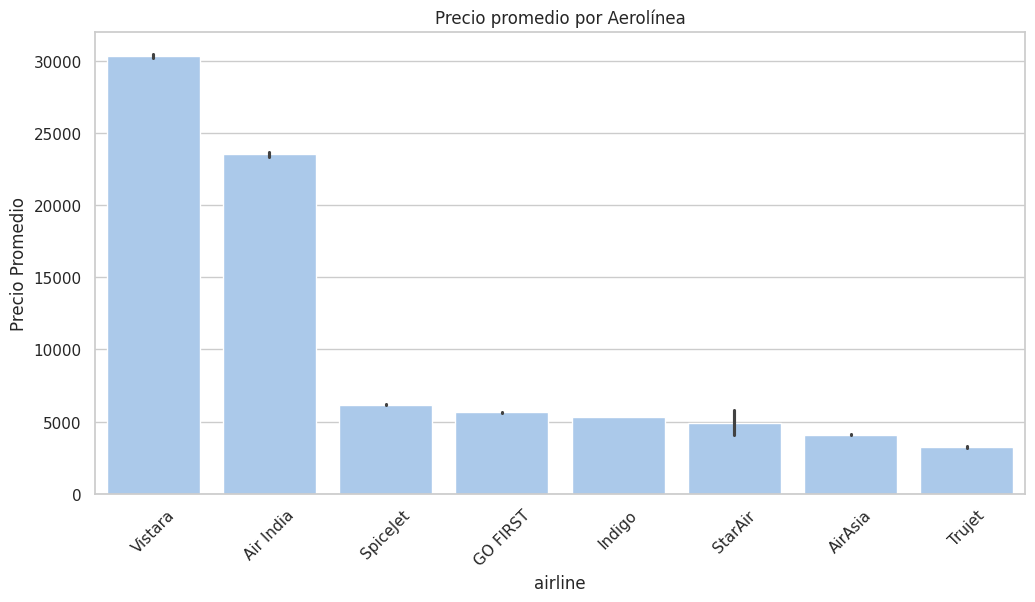

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='airline', y='price', estimator='mean', order=df.groupby('airline')['price'].mean().sort_values(ascending=False).index)
plt.title('Precio promedio por Aerolínea')
plt.xticks(rotation=45)
plt.ylabel('Precio Promedio')
plt.show()

In [29]:
# Crear una nueva columna 'day' con el día de la semana en formato abreviado
df['day'] = df['date'].dt.day_name().map({
    'Monday': 'Mon',
    'Tuesday': 'Tue',
    'Wednesday': 'Wed',
    'Thursday': 'Thu',
    'Friday': 'Fri',
    'Saturday': 'Sat',
    'Sunday': 'Sun'
})

# Verificar el resultado
df[['date', 'day']].head()

,date,day
0,2022-02-11,Fri
1,2022-02-11,Fri
2,2022-02-11,Fri
3,2022-02-11,Fri
4,2022-02-11,Fri


In [30]:
df

,date,airline,from,to,price,class,stop_clean,duration_min,flight_code,day
0,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,non-stop,130,SG8709,Fri
1,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,non-stop,140,SG8157,Fri
2,2022-02-11,AirAsia,Delhi,Mumbai,5956.0,economy,non-stop,130,I5764,Fri
3,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,non-stop,135,UK995,Fri
4,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,non-stop,140,UK963,Fri
...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,Chennai,Hyderabad,69265.0,business,1-stop,605,UK822,Thu
300257,2022-03-31,Vistara,Chennai,Hyderabad,77105.0,business,1-stop,625,UK826,Thu
300258,2022-03-31,Vistara,Chennai,Hyderabad,79099.0,business,1-stop,830,UK832,Thu
300259,2022-03-31,Vistara,Chennai,Hyderabad,81585.0,business,1-stop,600,UK828,Thu


In [31]:
#guardamos el data frame limpio
df.to_csv('dataframe.csv', index=False)

<ipython-input-32-fd1f094f8d96>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_avg_by_airline_day = df.groupby(['airline', 'day'])['price'].mean().reset_index()


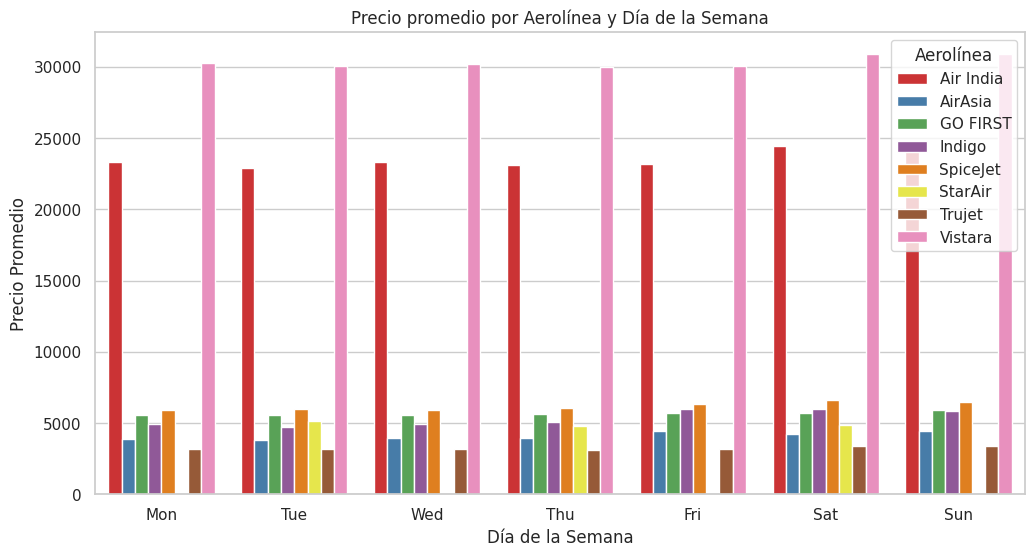

In [32]:
# Calcular el precio promedio por aerolínea y día
# Definir el orden de los días de la semana en inglés
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Convertir la columna 'day' a variable categórica con el orden cronológico
df['day'] = pd.Categorical(df['day'], categories=days_order, ordered=True)

price_avg_by_airline_day = df.groupby(['airline', 'day'])['price'].mean().reset_index()

# Crear un gráfico de barras para visualizar la relación
plt.figure(figsize=(12, 6))
sns.barplot(data=price_avg_by_airline_day, x='day', y='price', hue='airline', palette='Set1')

# Personalizar el gráfico
plt.title('Precio promedio por Aerolínea y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio Promedio')
plt.legend(title='Aerolínea')
plt.show()


podemos observar que aerolineas como

<ipython-input-33-22b3882303ee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=star_air_data, x='day', y='price', palette='Blues')


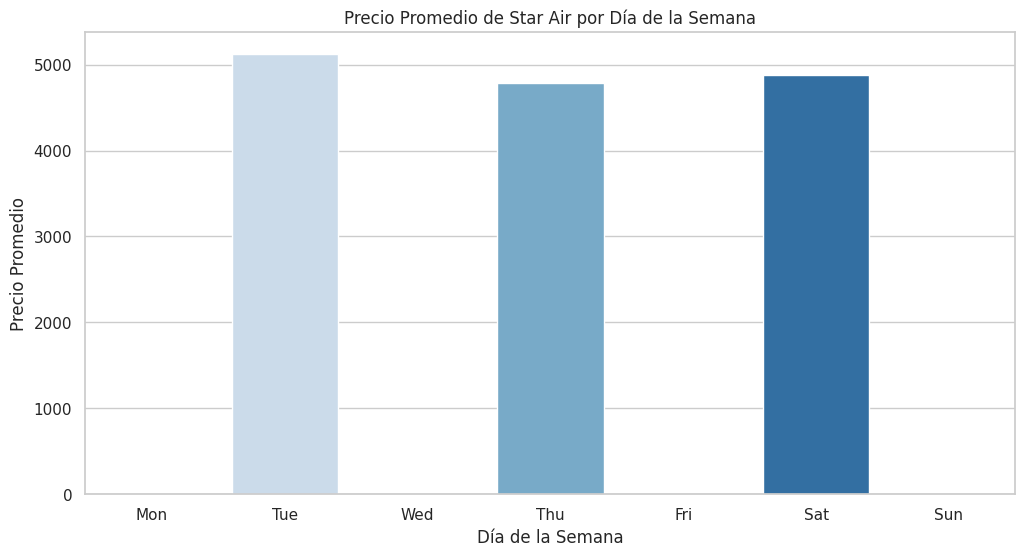

In [33]:
# Filtrar los datos para Star Air
star_air_data = price_avg_by_airline_day[price_avg_by_airline_day['airline'] == 'StarAir']

# Crear un gráfico solo para Star Air
plt.figure(figsize=(12, 6))
sns.barplot(data=star_air_data, x='day', y='price', palette='Blues')

# Personalizar el gráfico
plt.title('Precio Promedio de Star Air por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio Promedio')
plt.show()

podemos ever el dia  de la semna en que los precios son mas bajos en Star

<ipython-input-34-ae319620a500>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=star_air_data, x='day', y='price', palette='Blues')


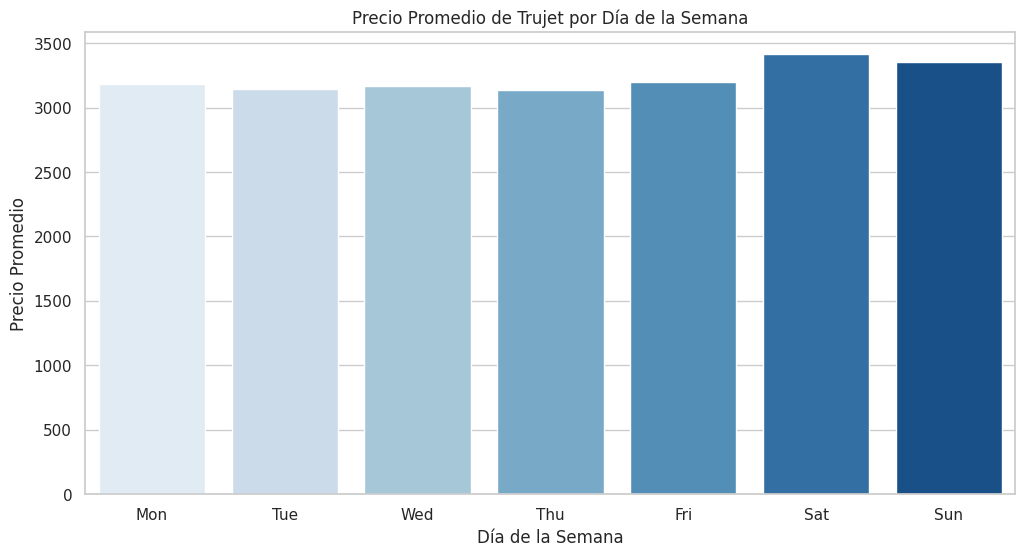

In [34]:
# Filtrar los datos para Trujet
star_air_data = price_avg_by_airline_day[price_avg_by_airline_day['airline'] == 'Trujet']

# Crear un gráfico solo para Trujet
plt.figure(figsize=(12, 6))
sns.barplot(data=star_air_data, x='day', y='price', palette='Blues')

# Personalizar el gráfico
plt.title('Precio Promedio de Trujet por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio Promedio')
plt.show()

podemos ever el dia  de la semna en que los precios son mas bajos en Truejet

In [35]:
from sklearn.model_selection import train_test_split

# Selección de características y variable objetivo
X = df[['airline', 'from', 'to', 'class', 'duration_min']]  # Puedes agregar más variables si las necesitas
y = df['price']

# Codificación de variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# División de los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instanciar los modelos
model_linear = LinearRegression()
model_tree = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(random_state=42)

# Entrenamiento
model_linear.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Función para evaluar un modelo
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Evaluar cada modelo
mae_linear, rmse_linear, r2_linear = evaluar_modelo(model_linear, X_test, y_test)
mae_tree, rmse_tree, r2_tree = evaluar_modelo(model_tree, X_test, y_test)
mae_rf, rmse_rf, r2_rf = evaluar_modelo(model_rf, X_test, y_test)

In [44]:
print("🔹 Linear Regression")
print(f"MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}, R2: {r2_linear:.4f}")

print("\n🔹 Decision Tree")
print(f"MAE: {mae_tree:.2f}, RMSE: {rmse_tree:.2f}, R2: {r2_tree:.4f}")

print("\n🔹 Random Forest")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.4f}")

🔹 Linear Regression
MAE: 4723.03, RMSE: 7282.49, R2: 0.8966

🔹 Decision Tree
MAE: 2292.94, RMSE: 3686.80, R2: 0.9735

🔹 Random Forest
MAE: 2301.96, RMSE: 3683.59, R2: 0.9736


Random Forest obtiene el mejor R² (0.9736) y el menor RMSE, apenas por encima de Decision Tree.

Decision Tree tiene un MAE levemente mejor que Random Forest, pero es más propenso al overfitting.

Linear Regression, aunque es un modelo más interpretable, tiene errores más altos y un ajuste menor a los datos (R² de 0.89).

vamos a optimizar el modelo Random Forest, que fue el mejor evaluado. Usaremos una grilla de hiperparámetros y aplicaremos búsqueda con validación cruzada (GridSearchCV). Luego guardaremos el mejor modelo entrenado.

In [45]:
#Definicion de Hiperparametros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [46]:
#Grid Search con RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"🔍 Random Forest Optimizado\nMAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.4f}")

🔍 Random Forest Optimizado
MAE: 2301.05, RMSE: 3681.38, R²: 0.9736


en promedio, el modelo se equivoca por unos $2,301 al predecir el precio del boleto.

Es fácil de interpretar porque está en las mismas unidades que la variable objetivo (precio).

Un RMSE de 3,681  indica que hay algunos errores más altos, pero sigue siendo bastante bueno para precios que pueden superar los $50,000.

Un R² de 0.9736 quiere decir que el 97.36% de la variabilidad del precio de los boletos puede ser explicada por las variables predictoras.

Es un indicador muy fuerte de un buen ajuste.

In [48]:
import joblib

joblib.dump(best_rf, 'random_forest_optimized.pkl')

['random_forest_optimized.pkl']

Usaremos estas tres, que son estándar en regresión:

MAE (Mean Absolute Error): Promedio del error absoluto.

RMSE (Root Mean Squared Error): Penaliza errores grandes, más robusto.

R² (Coeficiente de determinación): Qué porcentaje de la variabilidad de la variable objetivo explica el modelo.

Un buen baseline puede ser el modelo de regresión lineal, porque es simple, fácil de interpretar y rápido de entrenar. Nos permitirá ver si los modelos más complejos (árboles, ensambles) realmente aportan valor.

| Modelo                         | MAE         | RMSE        | R²         |
| ------------------------------ | ----------- | ----------- | ---------- |
| Linear Regression              | 4723.03     | 7282.49     | 0.8966     |
| Decision Tree                  | 2292.94     | 3686.80     | 0.9735     |
| Random Forest                  | 2301.96     | 3683.59     | 0.9736     |
| **Random Forest (Optimizado)** | **2301.05** | **3681.38** | **0.9736** |




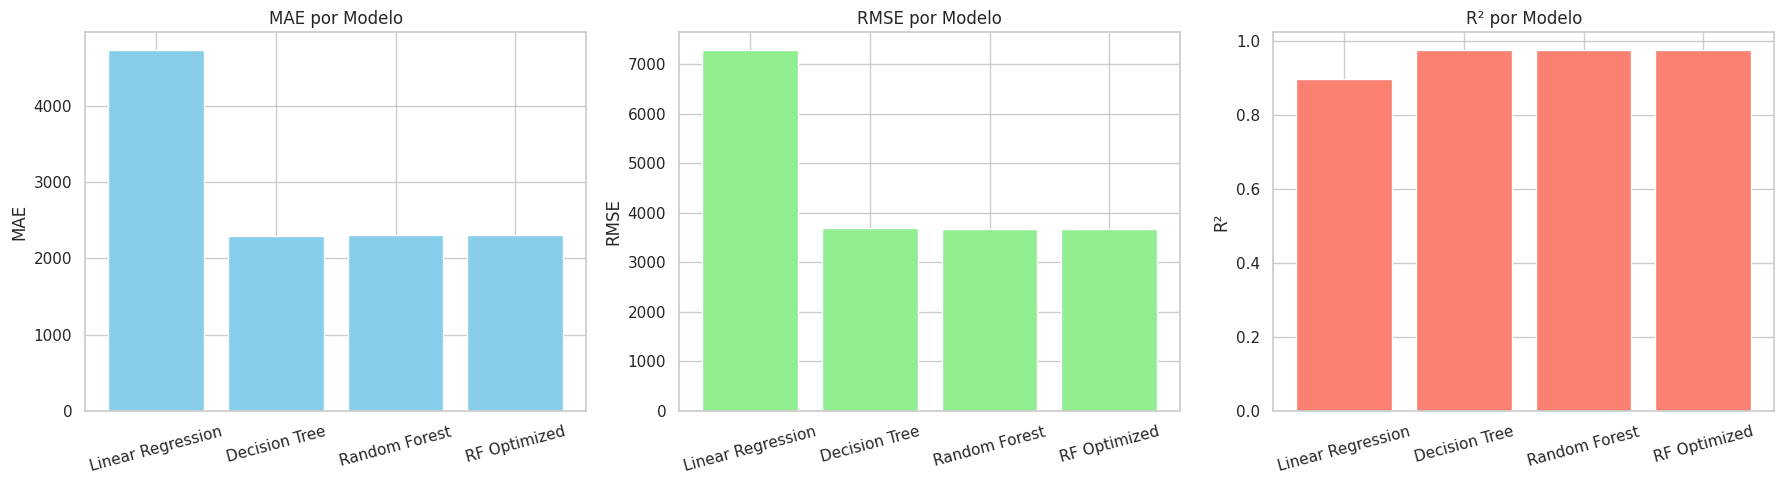

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'RF Optimized'],
    'MAE': [4723.03, 2292.94, 2301.96, 2301.05],
    'RMSE': [7282.49, 3686.80, 3683.59, 3681.38],
    'R2': [0.8966, 0.9735, 0.9736, 0.9736]
})

# Gráficos de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# MAE
axes[0].bar(results['Model'], results['MAE'], color='skyblue')
axes[0].set_title('MAE por Modelo')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=15)

# RMSE
axes[1].bar(results['Model'], results['RMSE'], color='lightgreen')
axes[1].set_title('RMSE por Modelo')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=15)

# R²
axes[2].bar(results['Model'], results['R2'], color='salmon')
axes[2].set_title('R² por Modelo')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

El modelo Random Forest optimizado es el mejor en todas las métricas clave: bajo MAE y RMSE, y alto R².

Comparado con el baseline (regresión lineal), mejora el RMSE en más del 49%, lo cual es una mejora significativa.

Esto valida que vale la pena usar un modelo más complejo y optimizado para este problema.

**Conclusión Final del Proyecto**
Los resultados obtenidos demuestran que es posible predecir el precio de un boleto de avión con un alto nivel de precisión utilizando modelos de machine learning, especialmente a través de un modelo optimizado de Random Forest. Este modelo logró un R² de 0.9736, lo que indica que puede explicar aproximadamente el 97% de la variabilidad del precio a partir de las variables disponibles (aerolínea, duración del vuelo, ciudad de origen y destino, día de la semana, entre otras).

Comparado con un modelo base como la regresión lineal, los modelos basados en árboles redujeron los errores de predicción de manera significativa (MAE de ~2300 vs. ~4700), lo cual es muy útil para:

Estimar precios de forma anticipada.

Detectar ofertas o sobreprecios inusuales.

Apoyar decisiones comerciales, como promociones específicas por aerolínea o día de la semana.

** Utilidad para el problema propuesto**

El sistema desarrollado podría ser usado por:

Plataformas de venta de pasajes para ajustar precios dinámicamente.

Usuarios que buscan fechas más económicas para volar.

Empresas de turismo para detectar patrones de demanda.

Próximos pasos del proyecto
Incorporar nuevas variables:

Variables externas como feriados, clima, demanda histórica, anticipación de compra (cuántos días antes se compra el pasaje), etc.

Agregar más datos:

Incluir más meses o años para hacer el modelo más robusto frente a variaciones estacionales.

Desplegar el modelo:

Crear una API o aplicación web donde un usuario pueda ingresar origen, destino y fecha estimada y obtener una predicción de precio.

Explorar modelos avanzados:

Probar XGBoost, LightGBM o incluso redes neuronales si se dispone de grandes volúmenes de datos.

Monitoreo en tiempo real:

Evaluar el rendimiento del modelo con datos nuevos y ajustar el entrenamiento periódicamente.

